In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() # transform to dataframe

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

645157     50325.0
671803     65000.0
557295     36000.0
265057    115000.0
555300     75000.0
210138     80000.0
583329     95000.0
333718     68500.0
299940     89833.5
421424    119908.0
Name: salary_year_avg, dtype: float64

<Axes: >

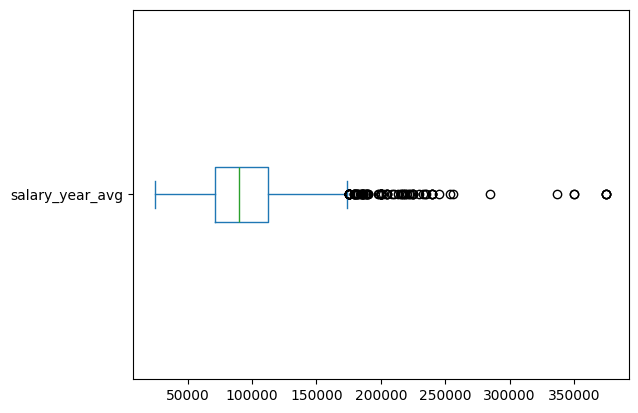

In [ ]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False) #vert stands for vertical

{'whiskers': [<matplotlib.lines.Line2D at 0x21f7799f0e0>,
 'caps': [<matplotlib.lines.Line2D at 0x21f7799f6b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f7799ee10>],
 'medians': [<matplotlib.lines.Line2D at 0x21f7799fd10>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f7799ffe0>],
 'means': []}

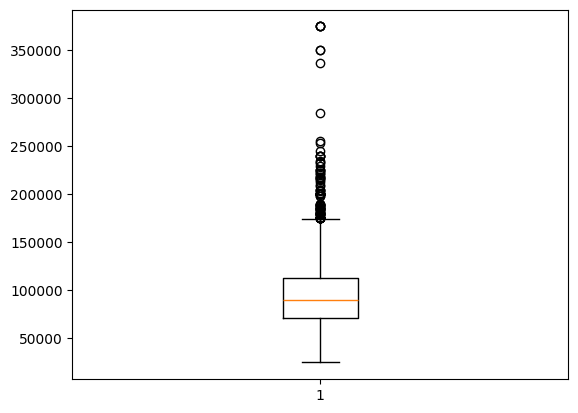

In [4]:
plt.boxplot(df_DA_US['salary_year_avg']) #matplotlib method

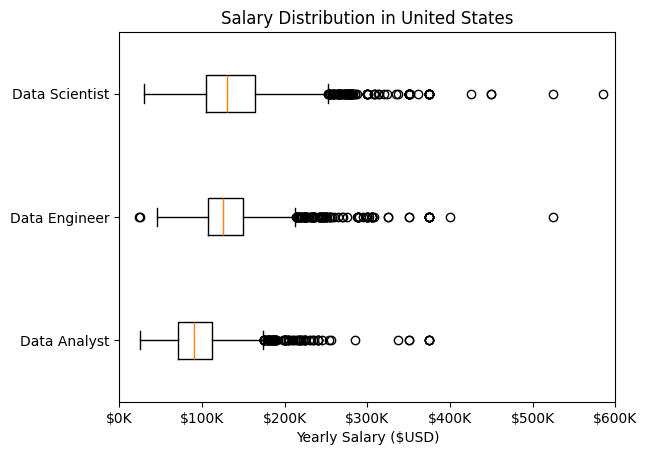

In [18]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter the data to appropriate job_titles
# Only get data analyst jobs in the US
df_US = df[(df['job_title_short'].isin(job_titles))  & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']== job_title] ['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels =job_titles, vert=False)
plt.title('Salary Distribution in United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

In [13]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64